In [4]:
import numpy as np                # linear algebra
import pandas as pd               # data processing
import matplotlib.pyplot as plt   # plotting
from scipy import optimize        # curve fitting

In [2]:
# incremental test data
stage = [2, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4]            # velocity in m/s
lactate = [1.8, 1.75, 1.98, 2.54, 3.46, 6.38, 14.37] # lactate in mmol/l
HR = [95, 108, 131, 152, 174, 185, 192]              # heart rate in bpm

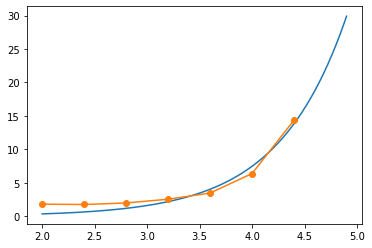

In [6]:
ExpFun = lambda v,a,b: a*np.exp(b*v)
coef = optimize.curve_fit(ExpFun, stage, lactate,  p0=(1, 1))
a, b = coef[0]

v = np.arange(min(stage), max(stage) + 0.5, 0.01)
lac_exp = ExpFun(v,a,b)

plt.plot(v,lac_exp)
plt.plot(stage,lactate,'-o')

In [23]:
v_ = np.array([stage[0], stage[-1]])

predLac = ExpFun(v_,a,b)

slope = (v_[1] - v_[0] / predLac[1] - predLac[0])
slope


3.913342825064697

In [24]:
np.interp(slope, lac_exp,v)

3.5809910744751585

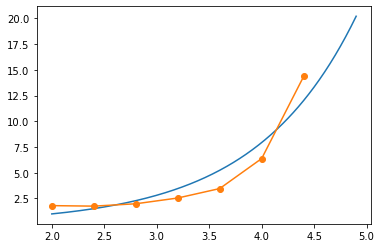

In [25]:
coef=np.polyfit(stage,np.log(lactate),1, w=np.sqrt(lactate))

lac_poly = np.exp(coef[1]) * np.exp(coef[0]*v)

plt.plot(v,lac_poly)
plt.plot(stage,lactate,'-o')


In [37]:
coef=np.polyfit(stage,lactate,3)
v = np.arange(min(stage), max(stage) + 0.5, 0.01)
lac = coef[3] + coef[2]*v + coef[1]*v**2 + coef[0]*v**3
dlac = coef[2] + coef[1]*2*v + coef[0]*3*v**2
ddlac = coef[1]*2 + coef[0]*6*v

slope = (stage[-1] - stage[0]) / (lactate[-1] - lactate[0])
np.interp(slope, dlac[ddlac>0],v[ddlac>0])


3.0552506812348676

In [41]:
index = np.argmax(np.diff(lactate)>0.4)

slope = (stage[-1] - stage[index]) / (lactate[-1] - lactate[index]) 
np.interp(slope, dlac[ddlac>0],v[ddlac>0])

3.044142053391652